<a href="https://colab.research.google.com/github/souadkhailia/Sales_predictions_2023/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales prediction project
Complete Project Notebook.

# Introduction


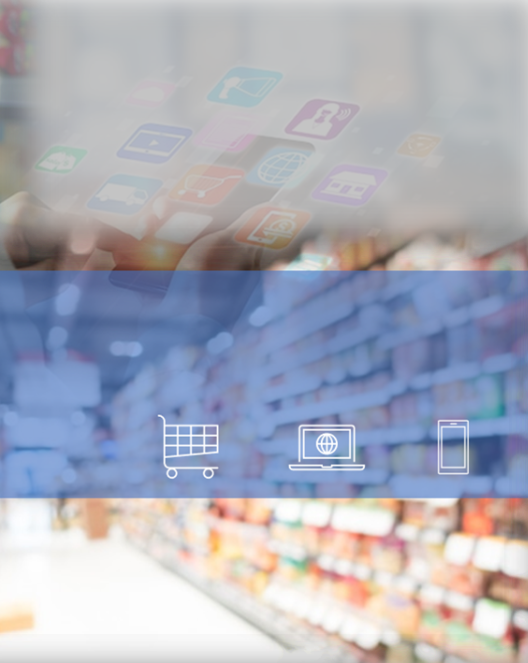

The goal of this code is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.


We will be following the CRISP-DM workflow for our analysis.  

<center>
<img src="https://raw.githubusercontent.com/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/main/Images/CRISP-DM.png" width=600px>


<a href="https://www.datascience-pm.com/crisp-dm-2">Image Source</a></center>



## Table of Contents


- [Phase 1) Data Understanding](#phase2)
- [Phase 2) Data Preparation](#phase3)
- [Phase 3) Modeling](#phase4)
- [Phase 4) Evaluation](#phase5)




<a name='phase2'></a>
# Phase 1) Data Understanding



## 1.1) What data have we been provided?



<ul><li> <a href="https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view" target="_blank">Share URL to a .csv file

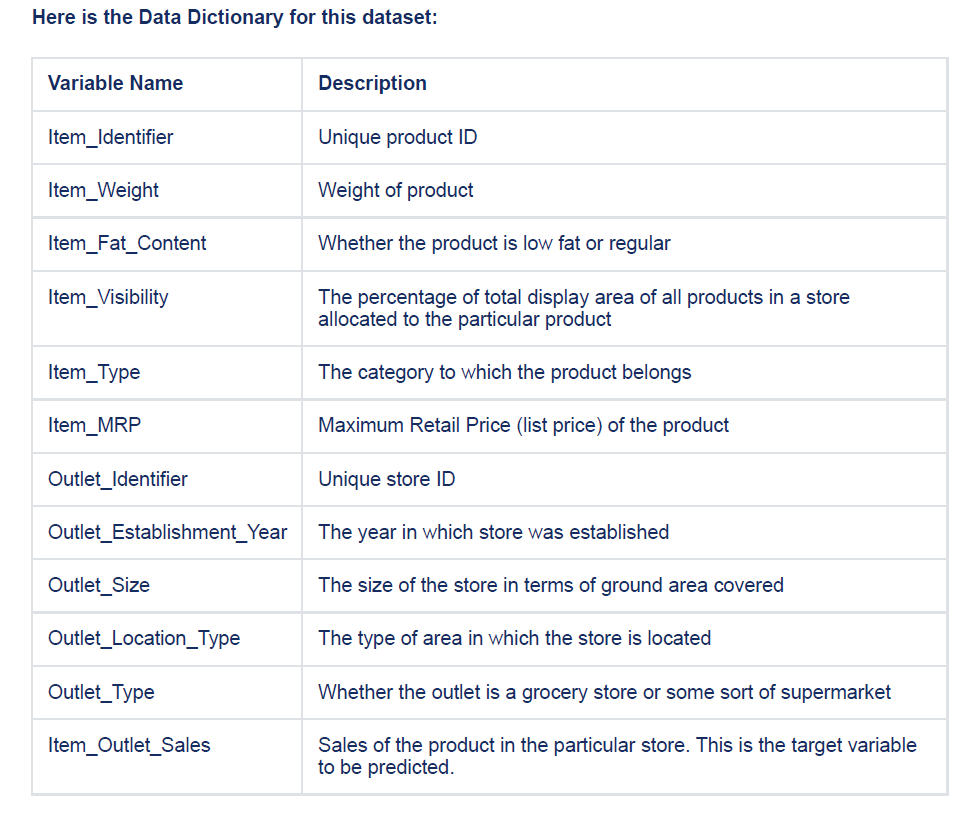






In [2]:
from IPython.display import clear_output
!pip install shap
clear_output()

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import set_config
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [7]:
# # Creating a folder for saving the project's images, data, etc.
import os
proj_folder = "/content/drive/MyDrive/data/"
proj_folder = '/content/'
proj_folder_images = proj_folder + "images/"
proj_folder_data = proj_folder + "data/"
os.makedirs(proj_folder_images, exist_ok=True)
os.makedirs(proj_folder_data, exist_ok=True)

In [8]:

# Load in the data
fpath = "/content/drive/MyDrive/data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
# Preview first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



## **1.2) What information is included in the data?**


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Get the number of rows (records) and columns (features)
num_rows, num_columns = df.shape
# Print the results
print(f"Number of features (columns): {num_columns}")
print(f"Number of records (rows): {num_rows}")

Number of features (columns): 12
Number of records (rows): 8523


In [11]:
# Get data type information for each feature
data_types = df.dtypes

# Count the occurrences of each data type
data_type_counts = data_types.value_counts()

# Print the results
print("There was a mixture of datatypes:")
for dtype, count in data_type_counts.items():
    print(f"{count} {dtype}")

There was a mixture of datatypes:
7 object
4 float64
1 int64


In [12]:
# the list the features of each data type
for dtype in data_type_counts.index:
    features = df.select_dtypes(include=[dtype]).columns
    if len(features) > 0:
        print(f"{len(features)} {dtype} features: {', '.join(features)}")

7 object features: Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type
4 float64 features: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales
1 int64 features: Outlet_Establishment_Year


### Inspecting Object Columns for Numeric Features

In [13]:
# Preview all object columns
df.select_dtypes("object").head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1



## **1.3) How clean is the data?**




### Are there any features with inconsistent values?


#### Checking Categorical Features for Inconsistencies

In [14]:
# Identify string columns
obj_cols = df.select_dtypes("object").columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [15]:
# Obtain the value counts for all string columns
for col in obj_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [16]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
# Standardize the values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Checking Numeric Features for Consistency

In [18]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96



### Are there duplicate rows?


In [19]:
# Include the first row along with all dupicates
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0



- [ ] There were no duplicate rows



### Are there missing values?



In [20]:
## Check for Null values
null_counts = df.isna().sum()
null_counts

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
# Getting nulls as percent of total vallues
null_percent = null_counts/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [22]:
## Combining null_counts and null_percent above
null_report = pd.DataFrame({'# Null':null_counts,
                            '% Null':null_percent}).round(2)
null_report

,# Null,% Null
Item_Identifier,0,0.00
Item_Weight,1463,17.17
Item_Fat_Content,0,0.00
Item_Visibility,0,0.00
Item_Type,0,0.00
Item_MRP,0,0.00
Outlet_Identifier,0,0.00
Outlet_Establishment_Year,0,0.00
Outlet_Size,2410,28.28
Outlet_Location_Type,0,0.00


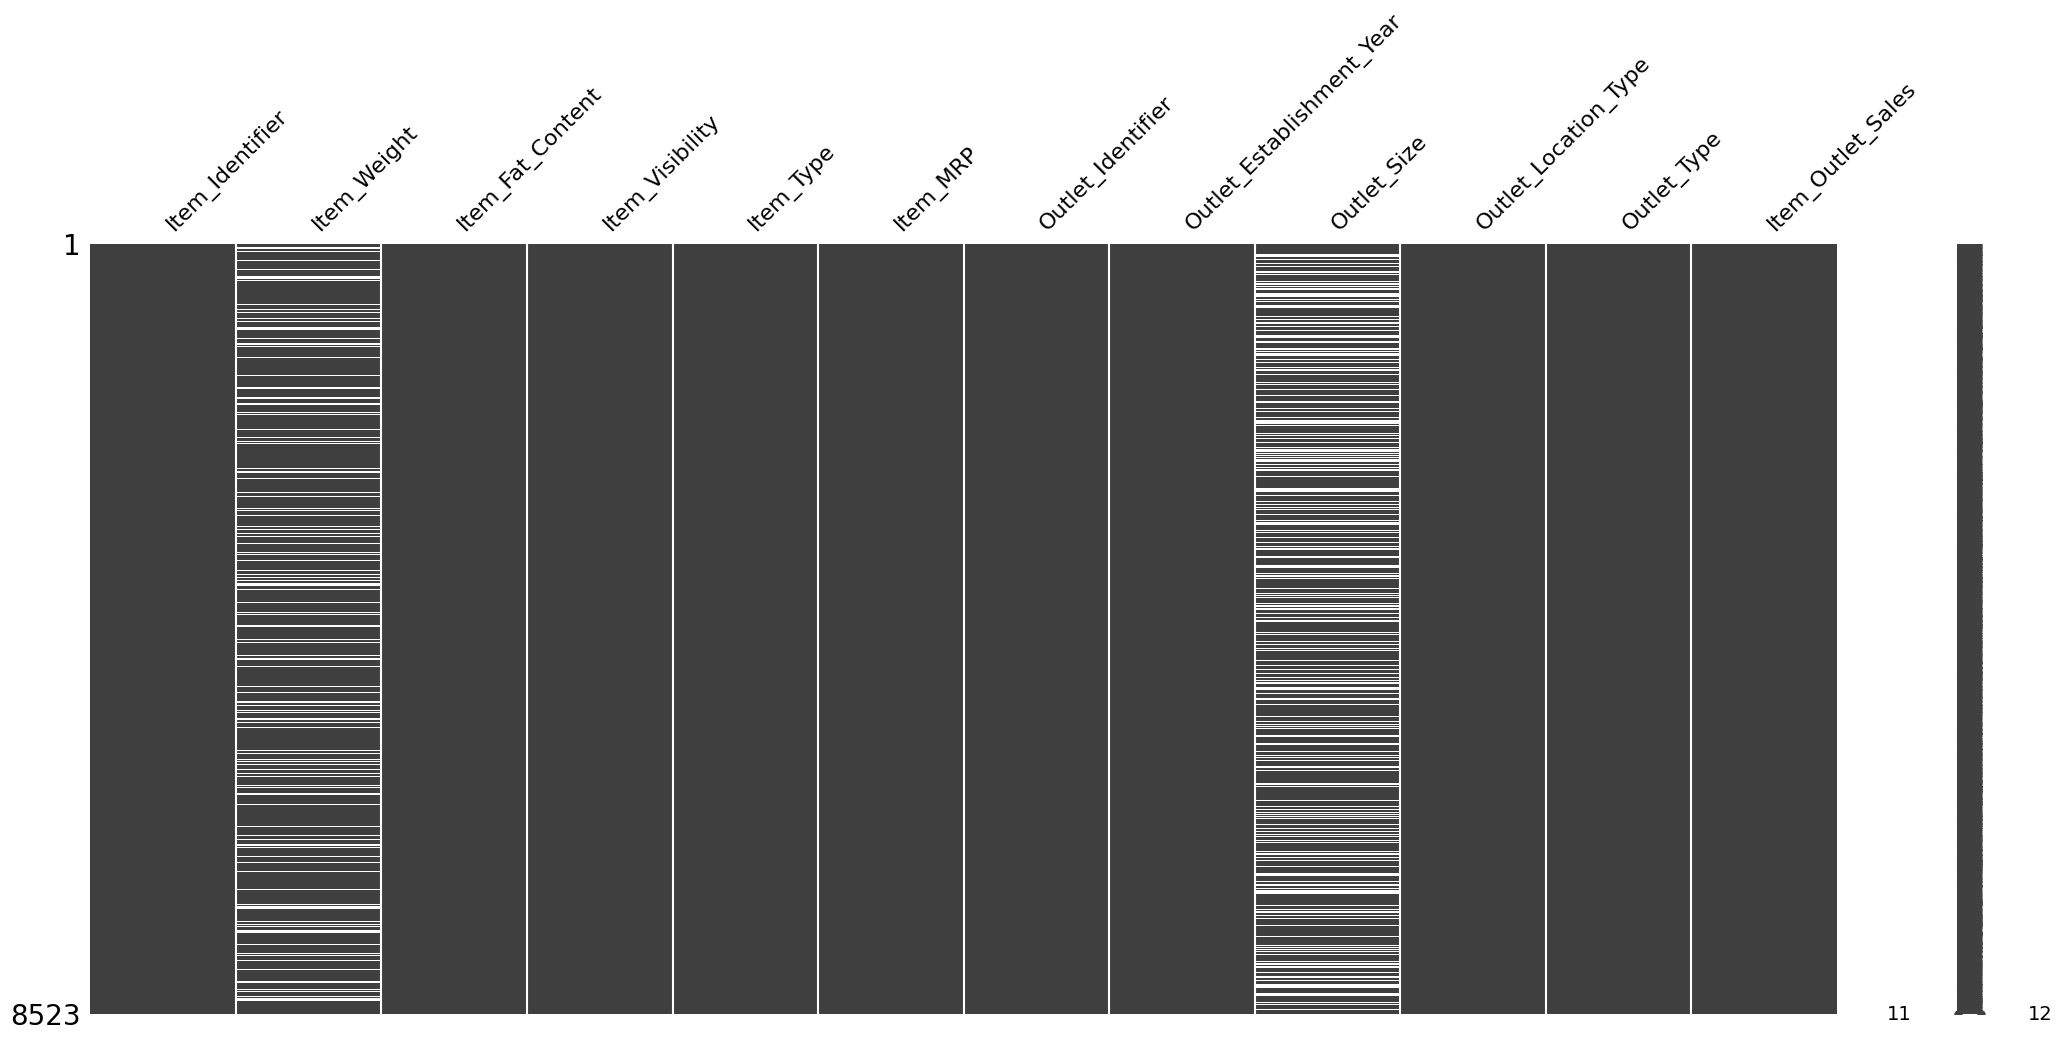

In [23]:
# Visualizing Missing Values with missingno
# Using missingno to view heatmap of NaN's
import missingno as msno
msno.matrix(df);

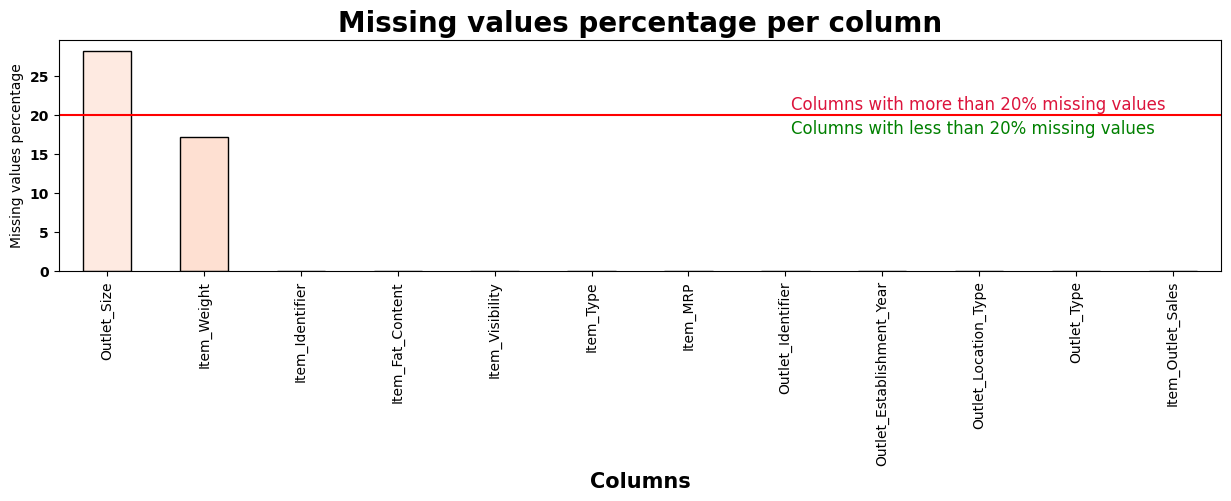

In [24]:
def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):

    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')

    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )

    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')

    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

## Part 2: Exploratory Data Analysis
- Phase 2.4 of CRISP-DM: Explore Each Feature

In [25]:
# Import modeling tools # Note: Move to top of final example notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## 2.4) What do the features look like and how are they related?</b></p>


In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)
cor = num_df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

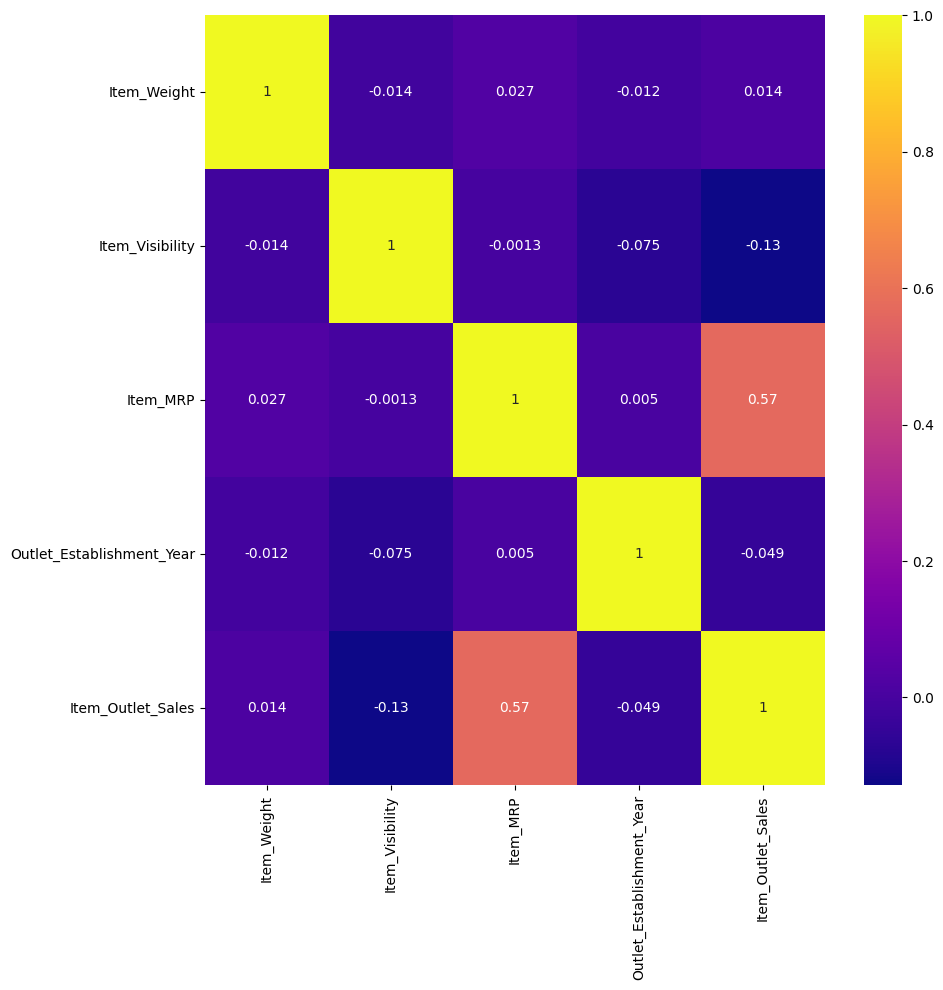

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap='plasma', annot=True)



*  There aren't really any strong correlations shown here.
*  There is postive correlation between the Item_MRP and the Item_Outlet_Sales.
*   All of the other correlations are negligible.
  

In [28]:
# Droping the columns Item_Weight and Outlet_Establishment_Year
df = df.drop(['Item_Weight', 'Outlet_Establishment_Year'], axis=1)

In [29]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Outlet_Size'], df['Outlet_Type'])

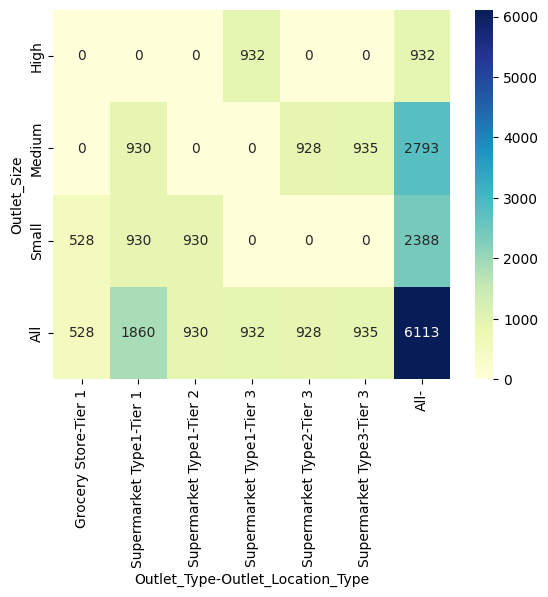

In [30]:
contingency_table = pd.crosstab(index=df['Outlet_Size'], columns=[df['Outlet_Type'], df['Outlet_Location_Type']], margins=True)
# Create a heatmap
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
# Show the plot
plt.show()

In [31]:
# Group the data by "Outlet_Identifier" and select "Outlet_Size" and "Outlet_Type"
grouped_data = df.groupby('Outlet_Identifier').agg({
    'Outlet_Size': 'first',
    'Outlet_Type': 'first',
    'Outlet_Location_Type':'first'
}).reset_index()
grouped_data

,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Location_Type
0,OUT010,None,Grocery Store,Tier 3
1,OUT013,High,Supermarket Type1,Tier 3
2,OUT017,None,Supermarket Type1,Tier 2
3,OUT018,Medium,Supermarket Type2,Tier 3
4,OUT019,Small,Grocery Store,Tier 1
5,OUT027,Medium,Supermarket Type3,Tier 3
6,OUT035,Small,Supermarket Type1,Tier 2
7,OUT045,None,Supermarket Type1,Tier 2
8,OUT046,Small,Supermarket Type1,Tier 1
9,OUT049,Medium,Supermarket Type1,Tier 1


In [32]:
# Condition 1: Outlet_Type is "Grocery Store"
condition1 = df['Outlet_Type'] == 'Grocery Store'

# Condition 2: Outlet_Type is "Supermarket Type1" and Outlet_Location_Type is "Tier 2"
condition2 = (df['Outlet_Type'] == 'Supermarket Type1') & (df['Outlet_Location_Type'] == 'Tier 2')

# For Condition 1, set missing "Outlet_Size" values to "Small"
df.loc[condition1 & df['Outlet_Size'].isnull(), 'Outlet_Size'] = 'Small'

# For Condition 2, set missing "Outlet_Size" values to "Small"
df.loc[condition2 & df['Outlet_Size'].isnull(), 'Outlet_Size'] = 'Small'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(7)
memory usage: 666.0+ KB


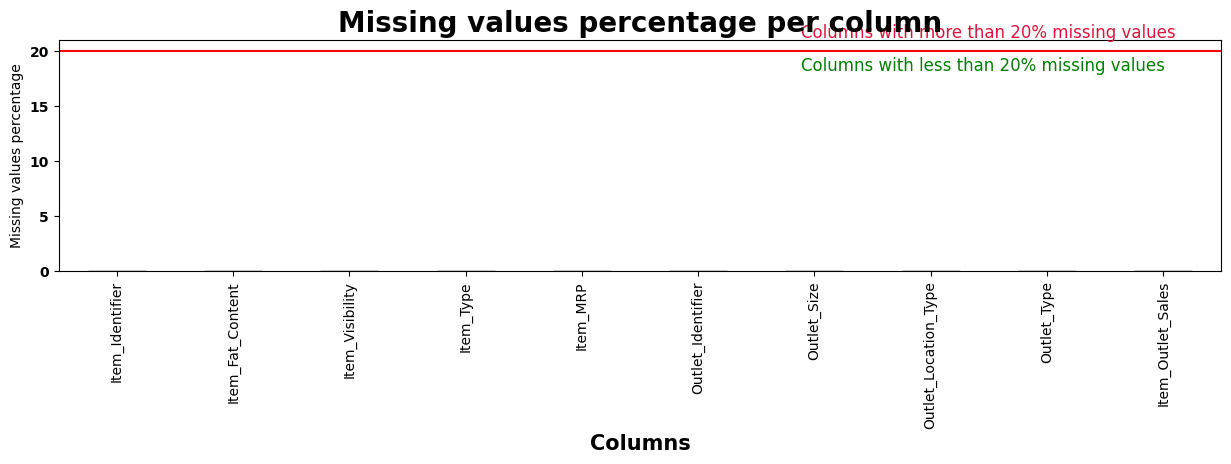

In [34]:
def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):

    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')

    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )

    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')

    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))


### Define EDA Functions

In [35]:
# def explore_categorical_check_constant(df, x, fillna = True, placeholder = 'MISSING',
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """BEST VERSION"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()


  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)


  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  ## Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = temp_df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]

  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, ax

In [36]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

In [37]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")


In [38]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax


### Visualizing Each Feature

In [39]:
# Get the list of categorical columns (columns with 'object' data type)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

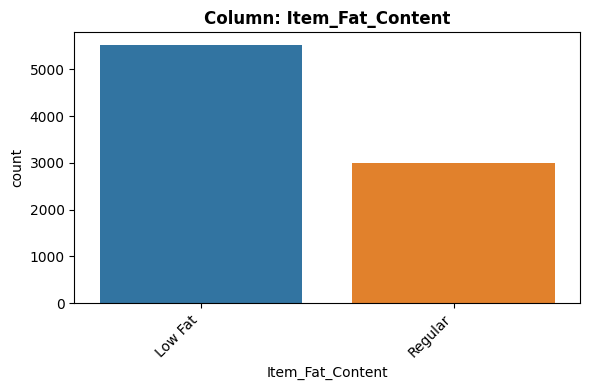

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)


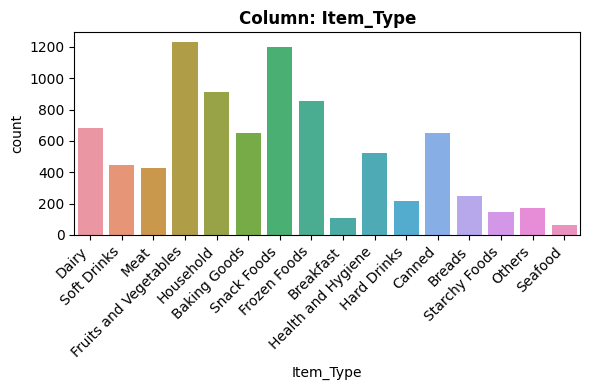

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)


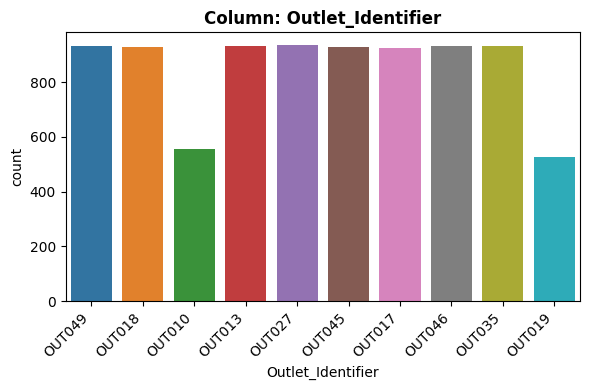

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)


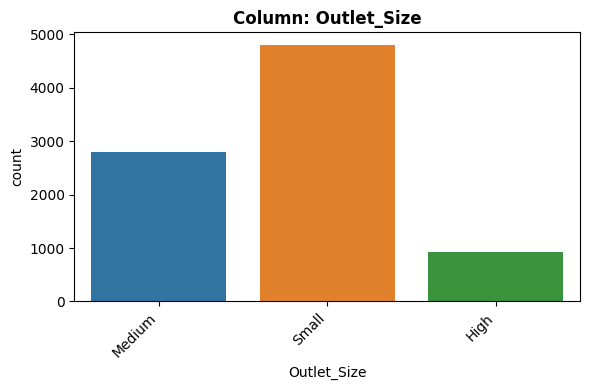

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Small' occurs 4798 times (56.29%)


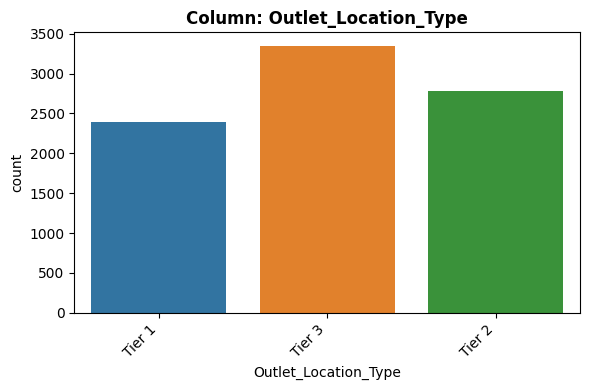

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)


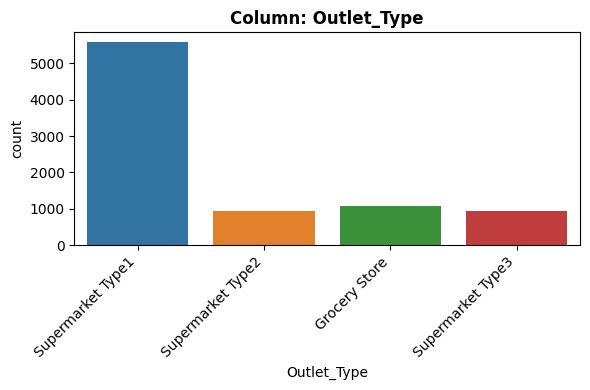

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)


In [40]:

explore_categorical(df, 'Item_Fat_Content');
explore_categorical(df, 'Item_Type');
explore_categorical(df, 'Outlet_Identifier');
explore_categorical(df, 'Outlet_Size');
explore_categorical(df, 'Outlet_Location_Type');
explore_categorical(df, 'Outlet_Type');

In [41]:
#droping the 'Item_Identifier' column due to high cardinality
df = df.drop(columns=['Item_Identifier'])

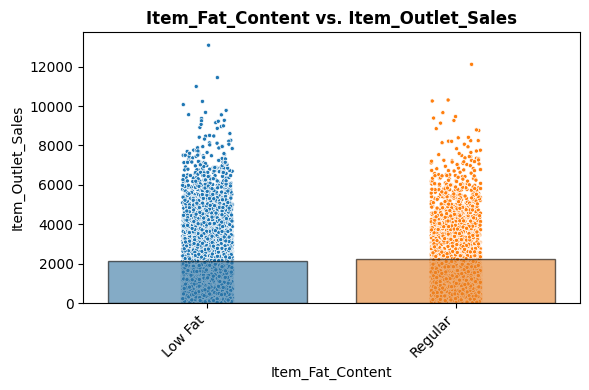

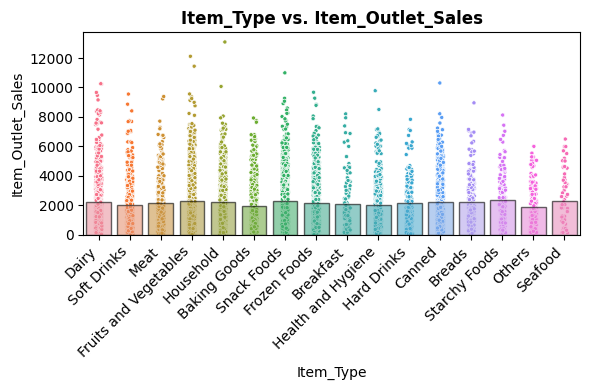

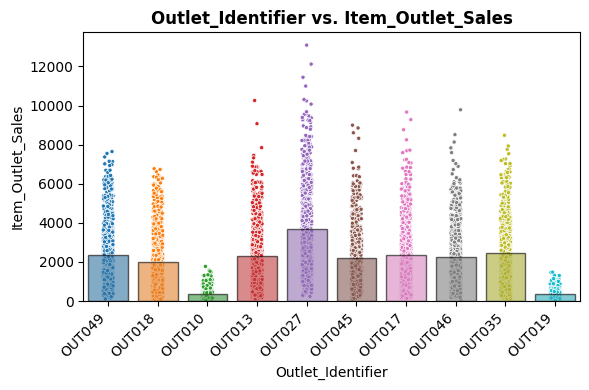

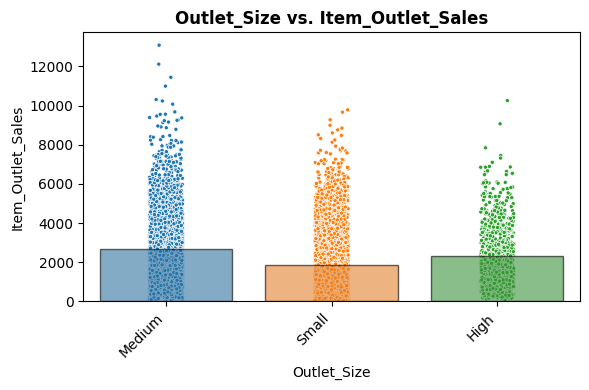

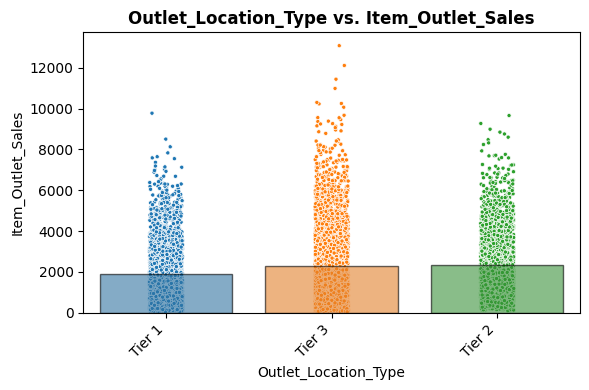

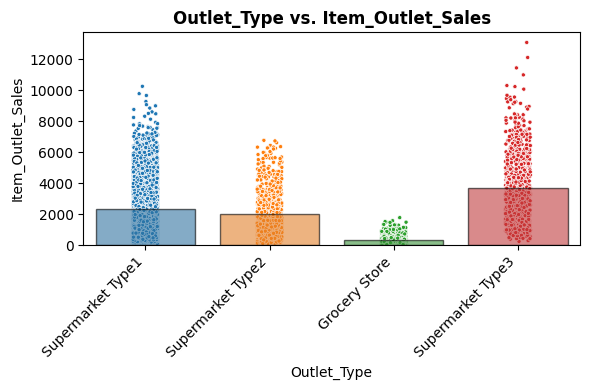

In [42]:

fig, ax = plot_categorical_vs_target(df, x='Item_Type', fillna=False)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Identifier', fillna=False)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Size', fillna=False)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Location_Type', fillna=False)
fig, ax = plot_categorical_vs_target(df, x='Outlet_Type', fillna=False)

the feature how appears to be a predictor of the target:

*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type






In [43]:
#droping the IItem_Fat_Content and Item_Type
df = df.drop(columns=['Item_Fat_Content','Item_Type'])

In [44]:
# the list of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

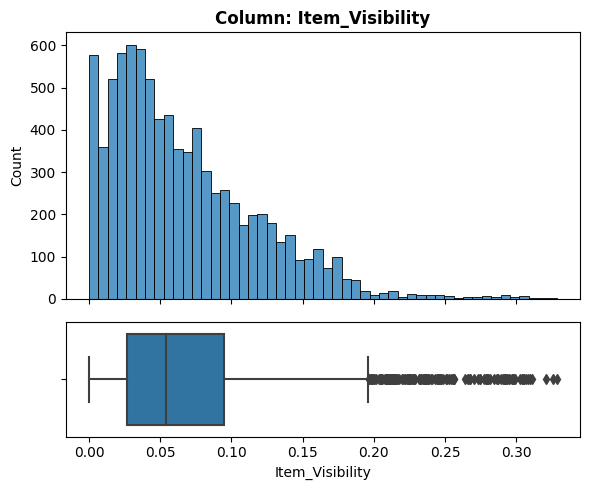

- NaN's Found: 0 (0.0%)


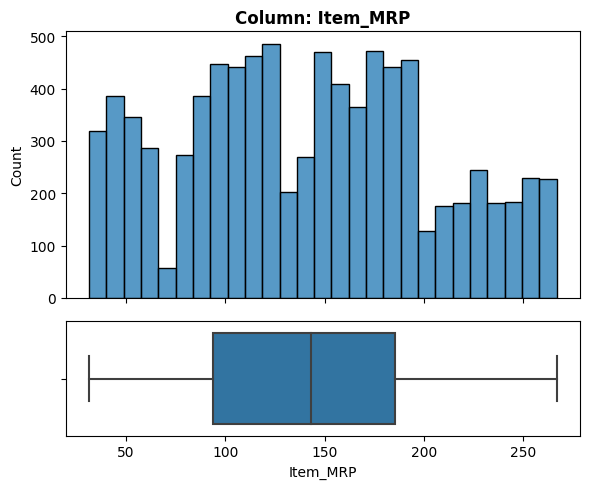

- NaN's Found: 0 (0.0%)


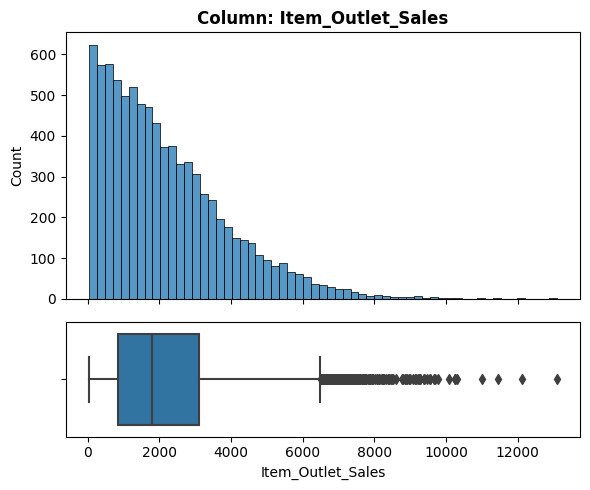

- NaN's Found: 0 (0.0%)


In [45]:
explore_numeric(df, "Item_Visibility")
explore_numeric(df, "Item_MRP")
explore_numeric(df, "Item_Outlet_Sales")

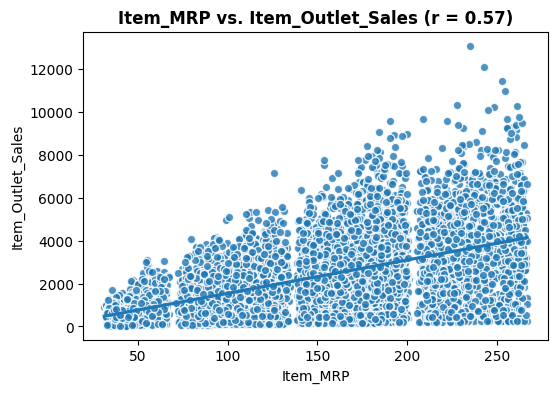

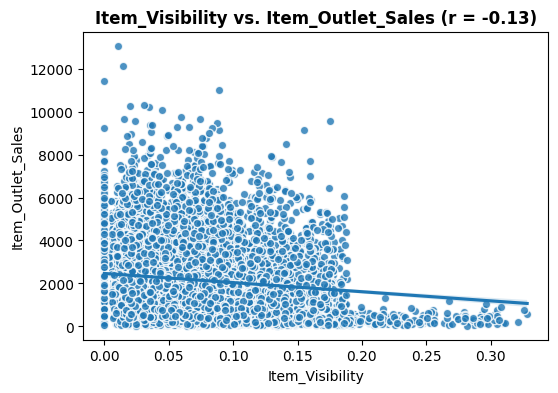

In [46]:
fig, ax = plot_numeric_vs_target(df, 'Item_MRP')
fig, ax = plot_numeric_vs_target(df, 'Item_Visibility')


In [47]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(df.columns) :
    nunique =df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+----------------------+---------------+
|       Features       | Unique Values |
+----------------------+---------------+
|   Item_Visibility    |      7880     |
|       Item_MRP       |      5938     |
|  Outlet_Identifier   |       10      |
|     Outlet_Size      |       3       |
| Outlet_Location_Type |       3       |
|     Outlet_Type      |       4       |
|  Item_Outlet_Sales   |      3493     |
+----------------------+---------------+


<a name='phase2'></a>
# Phase 2) Data Preparation

In [48]:

# The target we are trying to predict
y = df['Item_Outlet_Sales']
# The features we will use to make the prediction
X = df.drop(columns = ['Item_Outlet_Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,0.029565,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,0.000000,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,0.158716,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,0.014628,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,0.016645,120.9098,OUT045,Small,Tier 2,Supermarket Type1


### Preprocessing with ColumnTransformer

In [49]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
# print("Numeric Columns:", num_cols)
# instantiate preprocessors
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['Item_Visibility', 'Item_MRP'], dtype='object'))

In [50]:
## PREPROCESSING PIPELINE FOR ORDINAL DATA
ord_cols=['Outlet_Size','Outlet_Location_Type']
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
ord_encoder = OrdinalEncoder(categories=[["Small", "Medium", "High"],["Tier 1","Tier 2","Tier 3"]])
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(ord_encoder, scaler_ord)
## Making an ordinal_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

In [51]:
## PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
# print("OneHotEncoder Columns:", ohe_cols)

# Instantiate the individual preprocessors

ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)

# Making a ohe_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Outlet_Identifier', 'Outlet_Type'], dtype='object'))

<a name='phase3'></a>
# Phase 3) Modeling

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_metrics(reg,X_test,y_test, label='Test Data'):

  # Get predictions
  y_pred = reg.predict(X_test)

  # Get metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r_squared = r2_score(y_test, y_pred)

  # Print Result with label
  header = "---"*20
  print(header,f"Regresion Metrics: {label}",header, sep='\n')
  print(f"MAE = {mae:,.2f}")
  print(f"MSE = {mse:,.2f}")
  print(f"RMSE = {rmse:,.2f}")
  print(f"R^2 = {r_squared:,.2f}")

def evaluate_regression(reg, X_train, y_train, X_test, y_test):
  # Get results for training data
  regression_metrics(reg, X_train, y_train, label='Training Data' )
  # Get results for test data
  regression_metrics(reg, X_test, y_test, label='Test Data' )



```
# Ce texte est au format code
```

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
preprocessor=ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [56]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [57]:
# Build the pipeline with the Linear Regression model
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
lr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1186209.0603844821
R-squared: 0.5700547932645359


In [58]:
evaluate_regression(lr_pipeline, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 848.14
MSE = 1,300,844.88
RMSE = 1,140.55
R^2 = 0.56
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 802.42
MSE = 1,186,209.06
RMSE = 1,089.13
R^2 = 0.57


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Build the pipeline with the Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1216507.7782570545
R-squared: 0.5590729276266859


In [61]:

evaluate_regression(rf_pipeline, X_train, y_train, X_test,y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 300.00
MSE = 187,259.12
RMSE = 432.73
R^2 = 0.94
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 768.67
MSE = 1,216,507.78
RMSE = 1,102.95
R^2 = 0.56




### Tuning max_depth for RandomForestRegressor

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Build the pipeline with the Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10, 15],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Make predictions on the test set using the best model
predictions = random_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters:
{'regressor__n_estimators': 50, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 5, 'regressor__bootstrap': False}
Mean Squared Error: 1118110.2149818793
R-squared: 0.5947374340762479


In [64]:
evaluate_regression(random_search, X_train, y_train, X_test,y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 762.72
MSE = 1,172,226.83
RMSE = 1,082.69
R^2 = 0.60
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 738.44
MSE = 1,118,110.21
RMSE = 1,057.41
R^2 = 0.59


<a name='phase4'></a>
# Phase 4) Evaluation

### Best Model
>

*   The linear regression model emerges as the most suitable choice, outperforming the other models on the test dataset. However, it is important to note that the alternative models exhibit signs of overfitting, and, overall, none of the tested models yield satisfactory results. Our dataset may not be well-suited for any of the models under consideration.





<a name='phase4'></a>
# Phase 5) Build a feed-forward regression model with an appropriate output layer and loss function.

In [65]:
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [66]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()



In [68]:
df_reg= df.copy()

In [69]:
df_reg.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.000000,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800
4,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [70]:
# check missing values and duplicates
print('missing values', df_reg.info())
print('\nduplicated rows', df_reg.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       8523 non-null   float64
 1   Item_MRP              8523 non-null   float64
 2   Outlet_Identifier     8523 non-null   object 
 3   Outlet_Size           8523 non-null   object 
 4   Outlet_Location_Type  8523 non-null   object 
 5   Outlet_Type           8523 non-null   object 
 6   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(4)
memory usage: 466.2+ KB
missing values None

duplicated rows 1


In [71]:
# split data
y = df_reg['Item_Outlet_Sales']

X = df_reg.drop(columns = ['Item_Outlet_Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,0.029565,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,0.000000,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,0.158716,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,0.014628,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,0.016645,120.9098,OUT045,Small,Tier 2,Supermarket Type1


In [72]:
preprocessor=ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [73]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [74]:
# process the data
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_proc.shape

(6392, 18)


### Build and Train the Model

In [107]:
# create model architecture
input_dim = X_train_proc.shape[1]

reg_model = Sequential()

reg_model.add(Dense(18, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(18, activation='relu'))
reg_model.add(Dense(1, activation='linear'))

reg_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 18)                342       
                                                                 
 dense_16 (Dense)            (None, 18)                342       
                                                                 
 dense_17 (Dense)            (None, 1)                 19        
                                                                 
Total params: 703 (2.75 KB)
Trainable params: 703 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# compile model with additional metrics

reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])


In [109]:
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)


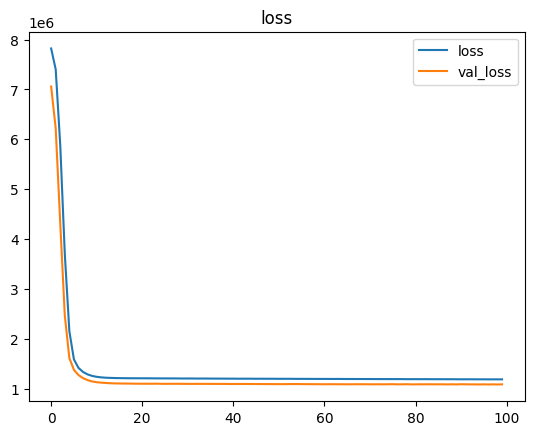

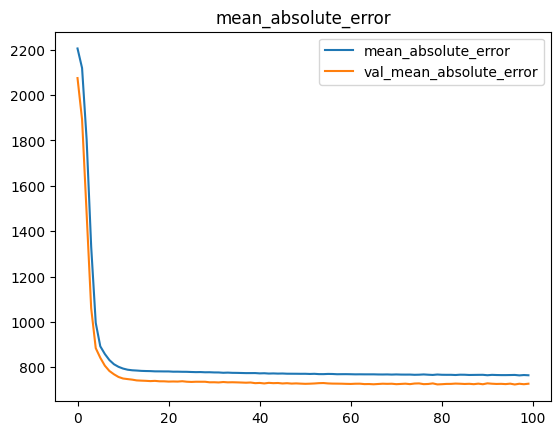

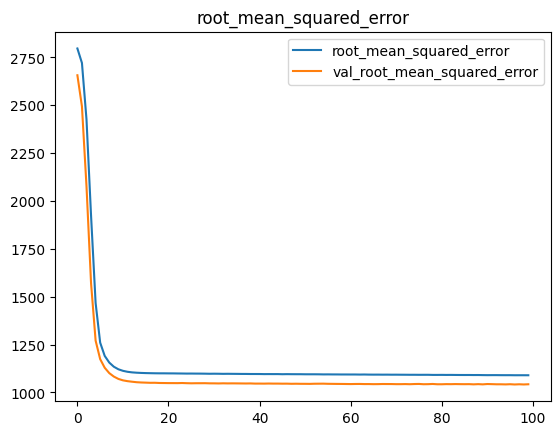

In [110]:
# plot learning

plot_history(history)


In [111]:
# evaluate model

y_pred = reg_model.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


67/67 [==============================] - 0s 1ms/step
final RMSE: 1042.4002226945117
final MAE: 727.8085536979571
final R2: 0.6061590542713757


In [112]:
evaluate_regression(reg_model, X_train_proc, y_train, X_test_proc,y_test)

200/200 [==============================] - 0s 1ms/step
------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 765.92
MSE = 1,185,495.00
RMSE = 1,088.80
R^2 = 0.60
67/67 [==============================] - 0s 2ms/step
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 727.81
MSE = 1,086,598.22
RMSE = 1,042.40
R^2 = 0.61
